In [1]:
from IPython.core.pylabtools import figsize
!pip install scikit-fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzz

In [3]:
"""
The universe of discourse for Service is [1, 10]. 
There are three MF attached to Service, representing Poor, Good and Excellent service. 
Poor will be represented by a Z-MF, 
Good by a Gaussian MF and Excellent by an S-MF. 
The breakpoints for Poor are at 1 and 5. 
The mean of Good is 5 and the sigma (std dev) is 2.
The breakpoints for Excellent are at 5 and 9. 
"""

service_range = np.arange(0,10,0.1)
service_poor = fuzz.zmf(service_range,1,5)
service_good = fuzz.gaussmf(service_range,5,2)
service_excellent = fuzz.smf(service_range,5,9)

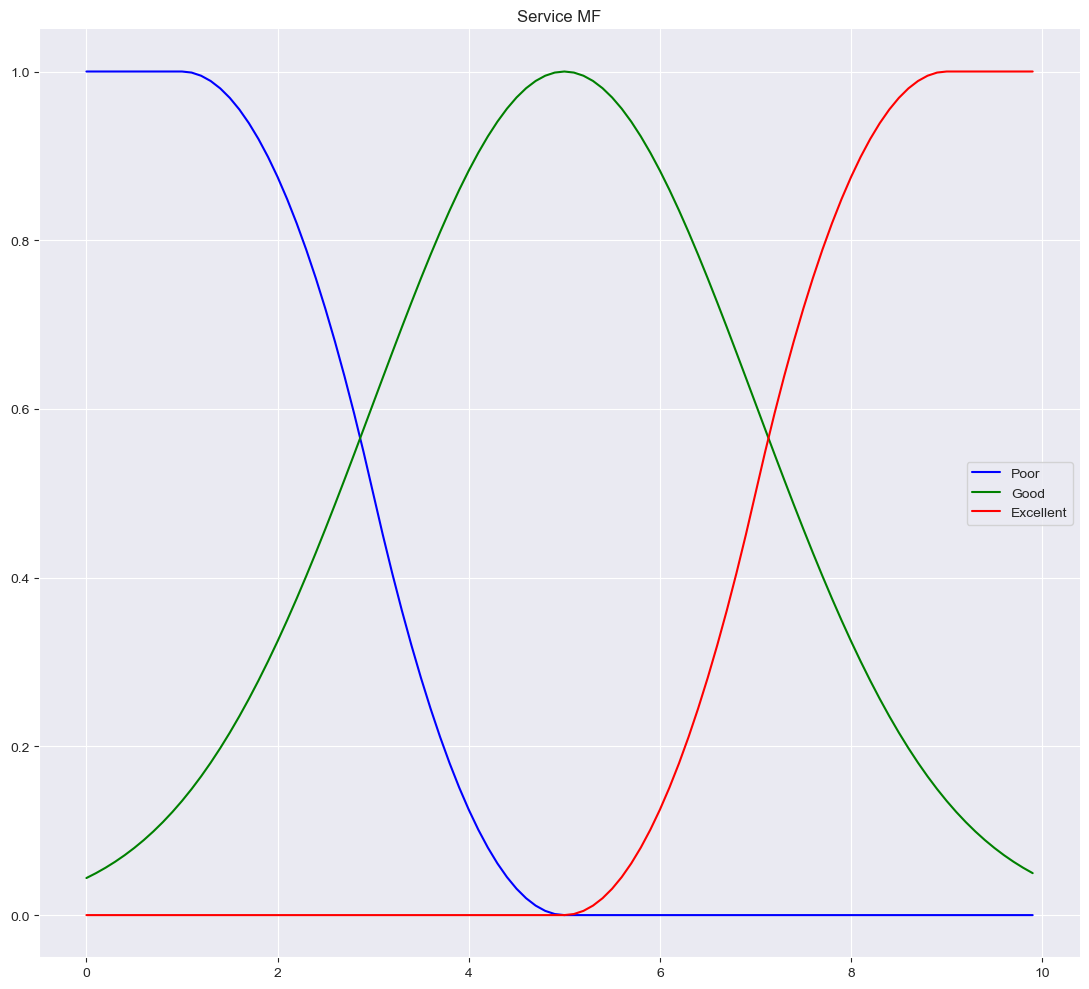

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, figsize=(11,10))
ax.plot(service_range, service_poor, 'b', linewidth=1.5, label='Poor')
ax.plot(service_range, service_good, 'g', linewidth=1.5, label='Good')
ax.plot(service_range, service_excellent, 'r', linewidth=1.5, label='Excellent')
ax.set_title('Service MF')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.tight_layout()
plt.show()

In [5]:
food_range = np.arange(0,10,0.1)
food_rancid = fuzz.trimf(food_range, [0, 0, 5])
food_good = fuzz.trimf(food_range, [0, 5, 10])
food_delicious = fuzz.trimf(food_range, [5, 10, 10])

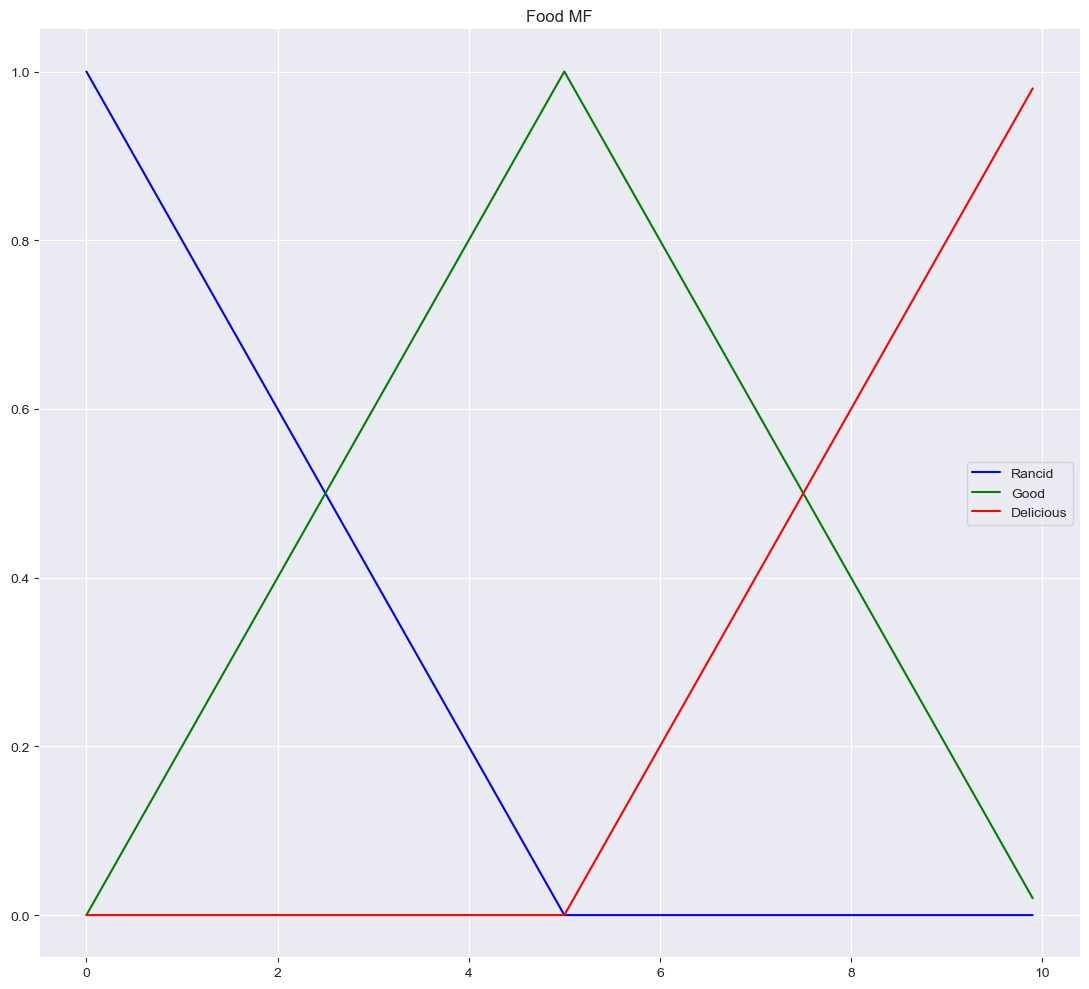

In [6]:


fig, ax = plt.subplots(nrows=1, figsize=(11,10))
ax.plot(food_range, food_rancid, 'b', linewidth=1.5, label='Rancid')
ax.plot(food_range, food_good, 'g', linewidth=1.5, label='Good')
ax.plot(food_range, food_delicious, 'r', linewidth=1.5, label='Delicious')
ax.set_title('Food MF')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.tight_layout()
plt.show()

In [7]:
tip_range = np.arange(0,26,1)
tip_cheap = fuzz.trimf(tip_range, [0, 5, 10])
tip_average = fuzz.trimf(tip_range, [7, 12, 17])
tip_generous = fuzz.trimf(tip_range, [15, 20, 25])

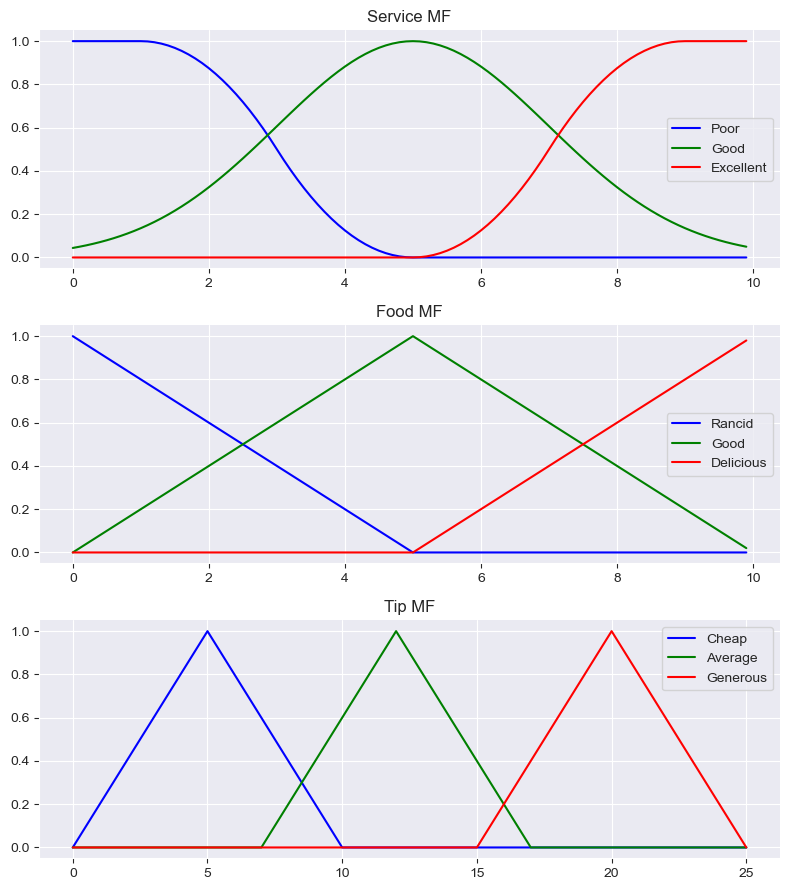

In [8]:
fig, (axS, axF, axT) = plt.subplots(nrows=3, figsize=(8,9))
axS.plot(service_range, service_poor, 'b', linewidth=1.5, label='Poor')
axS.plot(service_range, service_good, 'g', linewidth=1.5, label='Good')
axS.plot(service_range, service_excellent, 'r', linewidth=1.5, label='Excellent')
axS.set_title('Service MF')
axS.legend()
axS.spines['top'].set_visible(False)
axS.spines['right'].set_visible(False)
axS.get_xaxis().tick_bottom()
axS.get_yaxis().tick_left()

axF.plot(food_range, food_rancid, 'b', linewidth=1.5, label='Rancid')
axF.plot(food_range, food_good, 'g', linewidth=1.5, label='Good')
axF.plot(food_range, food_delicious, 'r', linewidth=1.5, label='Delicious')
axF.set_title('Food MF')
axF.legend()
axF.spines['top'].set_visible(False)
axF.spines['right'].set_visible(False)
axF.get_xaxis().tick_bottom()
axF.get_yaxis().tick_left()

axT.plot(tip_range, tip_cheap, 'b', linewidth=1.5, label='Cheap')
axT.plot(tip_range, tip_average, 'g', linewidth=1.5, label='Average')
axT.plot(tip_range, tip_generous, 'r', linewidth=1.5, label='Generous')
axT.set_title('Tip MF')
axT.legend()
axT.spines['top'].set_visible(False)
axT.spines['right'].set_visible(False)
axT.get_xaxis().tick_bottom()
axT.get_yaxis().tick_left()
plt.tight_layout()
plt.show()

In [9]:
from skfuzzy import control as ctrl

service = ctrl.Antecedent(service_range, 'service')

In [10]:
service['Poor'] = service_poor
service['Good'] = service_good
service['Excellent'] = service_excellent

In [11]:
food = ctrl.Antecedent(food_range, 'food')
food['Rancid'] = food_rancid
food['Good'] = food_good
food['Delicious'] = food_delicious

In [12]:
tip = ctrl.Consequent(tip_range, 'tip')
tip['Cheap'] = tip_cheap
tip['Average'] = tip_average
tip['Generous'] = tip_generous

In [13]:
rule1 = ctrl.Rule(service['Poor'] | food['Rancid'], tip['Cheap'])

In [14]:
rule2 = ctrl.Rule(service['Good'] , tip['Average'])

In [15]:
rule3 = ctrl.Rule(service['Excellent'] | food['Delicious'] , tip['Generous'])

In [16]:
rule_set = ctrl.ControlSystem([rule1, rule2, rule3])

In [17]:
tipping = ctrl.ControlSystemSimulation(rule_set)

In [18]:
tipping.input['service'] = 1

In [19]:
tipping.input['food'] = 1

In [20]:
tipping.compute()

In [21]:
print(tipping.output['tip'])

6.311575615975012


C:\Users\admin\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


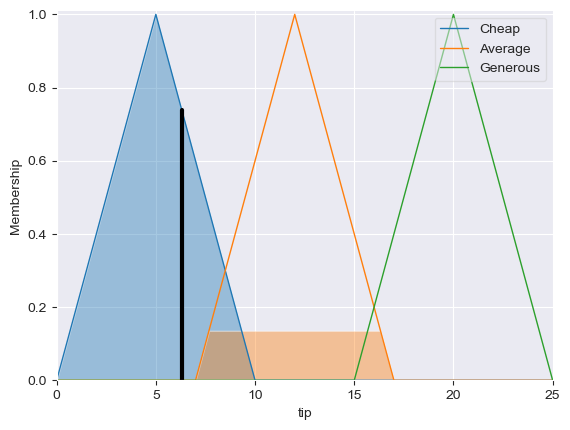

In [22]:
tip.view(sim=tipping)